<a href="https://colab.research.google.com/github/potgieterphiline/UdemyTrainingCode/blob/main/KNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from mlxtend.plotting import plot_decision_regions

import time
import numpy as np

#Create Sample Dataset

In [ ]:
inputs, targets = make_blobs(n_samples=1000,
                             centers=[(-3, 3),(0, 0),(2, 2)],
                             random_state = 365
                             )

In [ ]:
inputs.shape, targets.shape

((1000, 2), (1000,))

In [ ]:
data = pd.DataFrame(data = inputs, columns = ['Feature1','Feature2'])


In [ ]:
data['target'] = targets
data

,Feature1,Feature2,target
0,1.630460,2.094029,2
1,-2.811252,3.852241,0
2,0.501051,1.582531,2
3,-3.624112,3.325318,0
4,-3.278106,2.359416,0
...,...,...,...
995,-4.412271,2.420197,0
996,0.398022,-0.847863,1
997,-0.588974,0.317711,1
998,-2.328593,4.957489,0


In [ ]:
knn_palette = sns.color_palette("flare", as_cmap=True)


<Axes: xlabel='Feature1', ylabel='Feature2'>

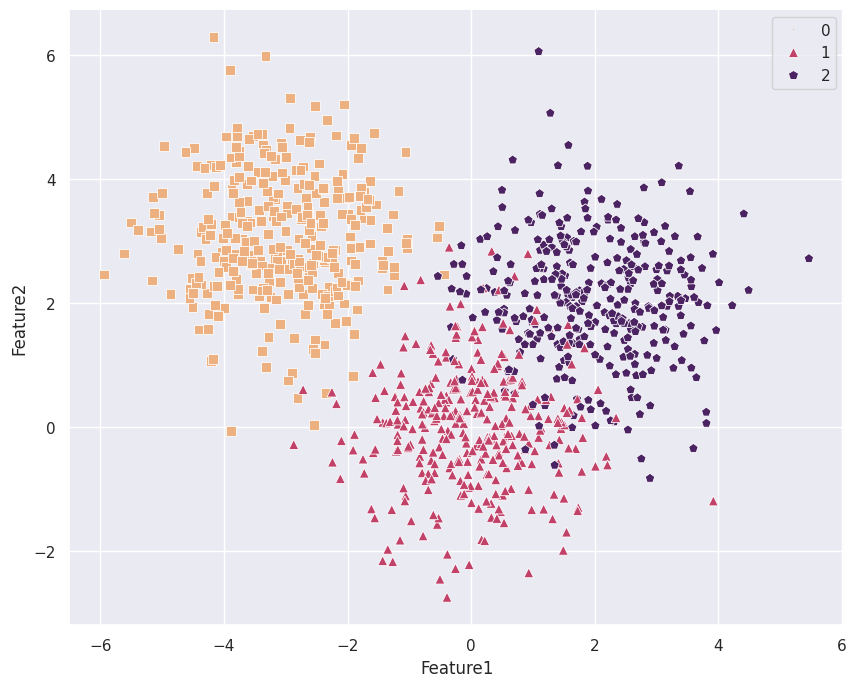

In [ ]:
sns.set()
plt.figure(figsize = (10,8))

sns.scatterplot(data = data,
                x = 'Feature1', y = 'Feature2',
                hue = targets,
                palette= knn_palette,
                markers = ([',','^','p']),
                style = targets,
                s = 50)

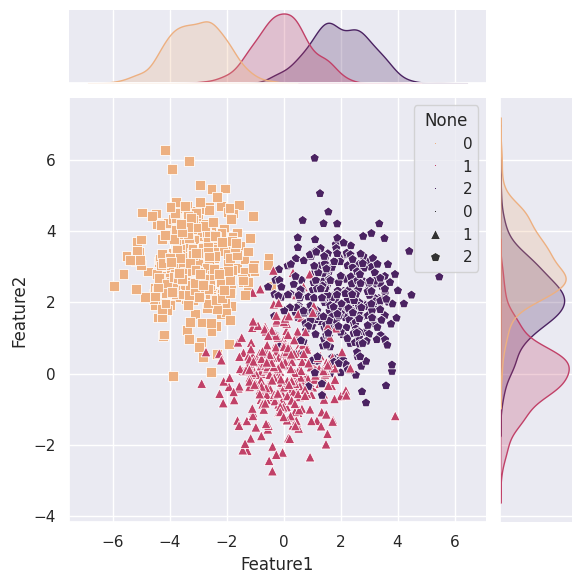

In [ ]:
sns.set()

sns.jointplot(data = data,
                x = 'Feature1', y = 'Feature2',
                hue = targets,
                palette= knn_palette,
                markers = ([',','^','p']),
                style = targets,
                s = 50)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.2, random_state = 365, stratify = targets)

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 100, weights = 'distance')

In [ ]:
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=100, weights='distance')

In [ ]:
featurea = -0.18
featureb = 3.2

clf.predict([[featurea,featureb]])

array([2])

In [ ]:
neighbors = clf.kneighbors([[featurea,featureb]])
neighbors

(array([[0.27086818, 0.34749744, 0.40387913, 0.45668128, 0.57370524,
         0.58002987, 0.6147827 , 0.62680551, 0.76674656, 0.77233172,
         0.78175021, 0.84541382, 0.8741025 , 0.8769993 , 0.89014688,
         0.91521046, 0.92223527, 0.99986243, 1.01649367, 1.0231371 ,
         1.03996308, 1.04075309, 1.05202214, 1.05586882, 1.10512231,
         1.14601178, 1.15303035, 1.16564948, 1.16938942, 1.16964811,
         1.18573712, 1.18923408, 1.23889624, 1.28767142, 1.304089  ,
         1.31000304, 1.31417662, 1.34795773, 1.37834986, 1.37837047,
         1.39317797, 1.39935598, 1.40472945, 1.40940732, 1.4245315 ,
         1.43699656, 1.44405502, 1.44585484, 1.44888849, 1.45687724,
         1.47052136, 1.47559224, 1.47869457, 1.49718927, 1.51720334,
         1.52240312, 1.52929153, 1.5314974 , 1.54220414, 1.55904781,
         1.56653484, 1.57060723, 1.57139492, 1.57614356, 1.58392843,
         1.58931784, 1.5935638 , 1.61016105, 1.61091035, 1.62070325,
         1.63081464, 1.63668458, 1

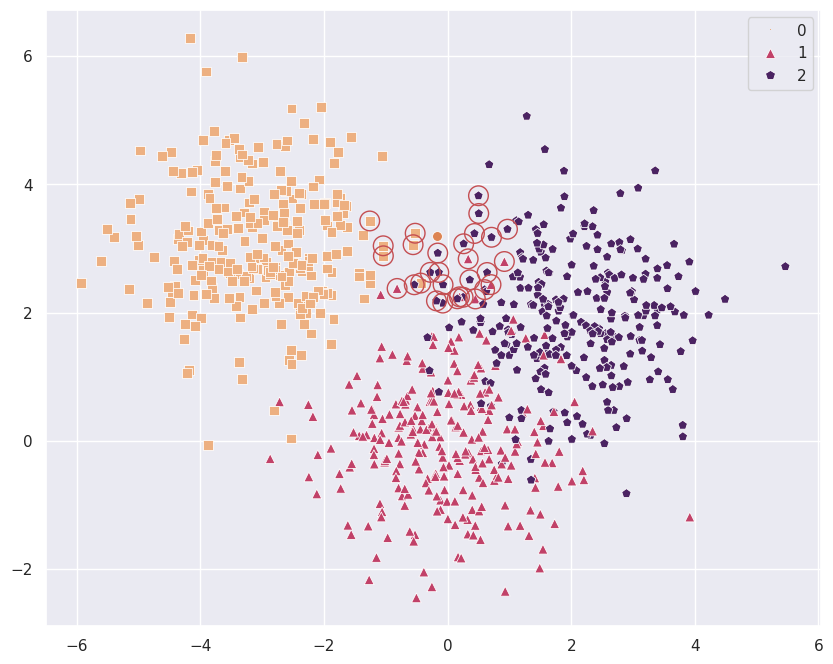

In [ ]:
sns.set()

plt.figure(figsize = (10,8))

sns.scatterplot(x = x_train[:, 0], y = x_train[:, 1],
                hue = y_train,
                palette= knn_palette,
                markers = ([',','^','p']),
                style = y_train,
                s = 50,
                legend = True)


sns.scatterplot(x = [featurea],y= [featureb],
                markers = (['o']),
                style = featureb,
                s = 50,
                legend = False)


plot_x_train = []
plot_y_train = []

for i in neighbors[1]:
    plot_x_train.append(x_train[i, 0])
    plot_y_train.append(x_train[i, 1])

plt.scatter(plot_x_train,
            plot_y_train,
            s=200, facecolors='none', edgecolors='r');

In [ ]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 30,
 'p': 2,
 'weights': 'distance'}

In [ ]:
x_train.shape, y_train.shape

((800, 2), (800,))

<Axes: >

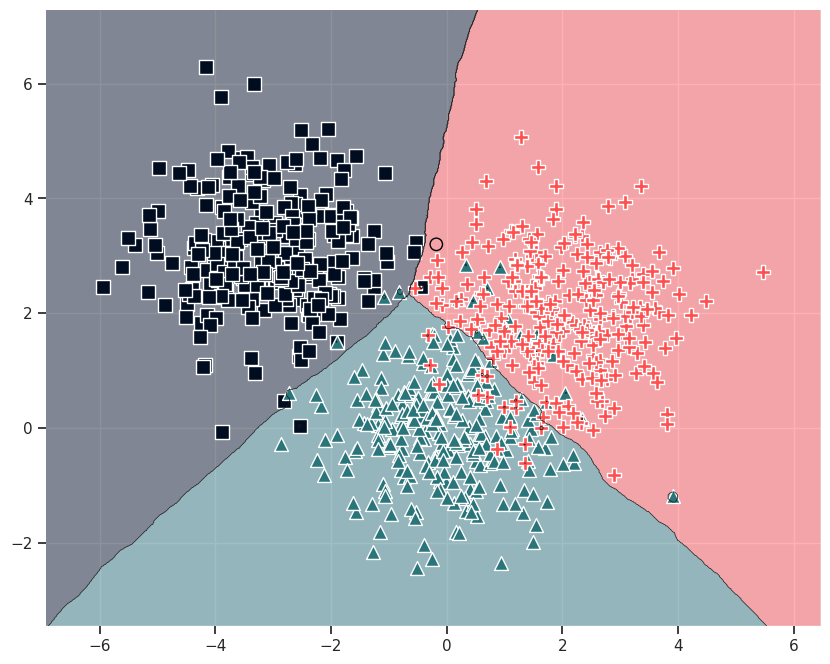

In [ ]:
plt.figure(figsize = (10,8))

plot_decision_regions(X = x_train,
                      y = y_train,
                      X_highlight = np.array([[featurea,featureb]]),
                      clf=clf,
                      markers = [',', '^', 'P'],
                      colors = '#000c1f,#29757a,#ff5050',
                      scatter_kwargs = {'s':100, 'edgecolor':'white', 'alpha':1},
                      legend = 0

                    )

In [ ]:
error_uniform =[]
error_distance = []
k_range = range(1,51)

for k in k_range:
  clf = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
  clf.fit(x_train,y_train)
  predictions = clf.predict(x_test)
  error_uniform.append(1-accuracy_score(y_test,predictions))

  clf = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
  clf.fit(x_train,y_train)
  predictions = clf.predict(x_test)
  error_distance.append(1-accuracy_score(y_test,predictions))


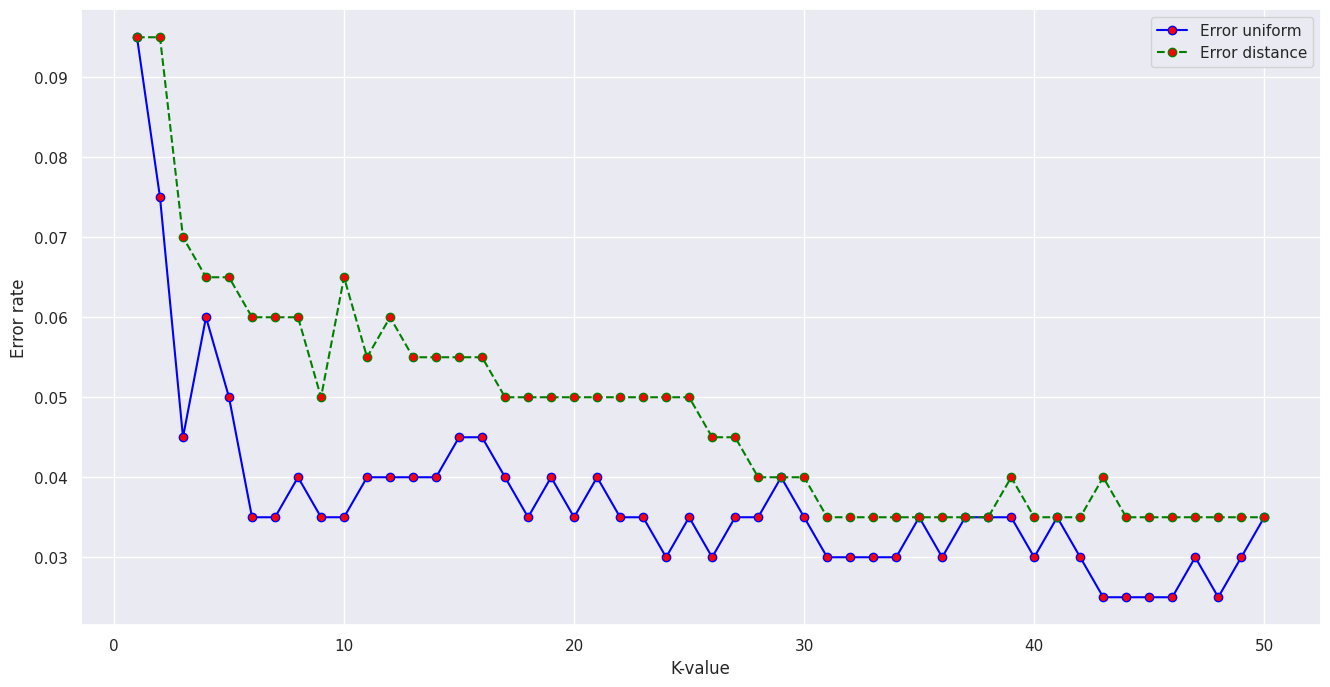

In [ ]:
plt.figure(figsize = (16,8))

plt.plot(k_range, error_uniform, c = 'blue', linestyle = 'solid',
         marker = 'o', markerfacecolor = 'red',  label = 'Error uniform');
plt.plot(k_range, error_distance, c = 'green', linestyle = 'dashed',
         marker = 'o', markerfacecolor = 'red', label = 'Error distance');

plt.legend()

plt.xlabel('K-value')
plt.ylabel('Error rate');

In [ ]:
parameters = {'n_neighbors':range(1, 51),
              'weights':['uniform', 'distance']}

In [ ]:
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid = parameters,
                           scoring = 'accuracy')

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [ ]:
clf = grid_search.best_estimator_
clf

KNeighborsClassifier(n_neighbors=10)

In [ ]:
grid_search.best_score_

np.float64(0.9512499999999999)

In [ ]:
y_test_pred = clf.predict(x_test)
y_test_pred.shape

(200,)

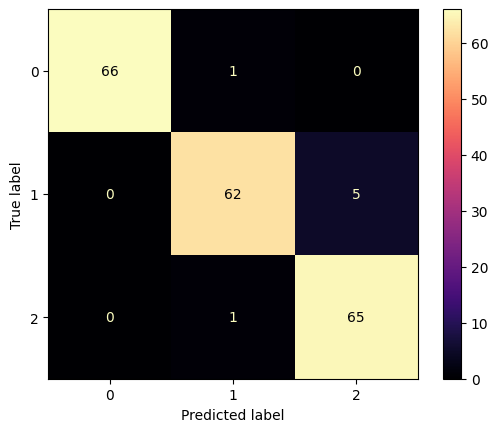

In [ ]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

In [ ]:
print(classification_report(y_test, y_test_pred, target_names = ['0', '1', '2']))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.97      0.93      0.95        67
           2       0.93      0.98      0.96        66

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200

